<font size=18>Lesson 02: Sensitivity Analysis and Abstract Modeling</font>

In [11]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

# Sensitivity Analysis

## The Need for Sensitivity Analysis (video)

This video provides a little motivation for this topic.

In [12]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-need-sensitivity-analysis/index.html",
    width=640,
    height=360)

## Sensitivity for Each Type of Parameter (video)

This video shows the relation of sensitivity to the model formulation.

In [13]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-sensitivity-each-type-v2/index.html",
    width=640,
    height=360)

## Shadow Prices (video)

Here are a few comments about shadow prices.

In [14]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-shadow-prices/index.html",
    width=640,
    height=360)

## <font color = "blue"> Self Assessment: Positive Shadow Price </font>

True or False:  A positive shadow price indicates that the right-hand side of that constraint is a sensitive parameter.

## Shadow Prices with the Widget (video)

This is a demonstration of shadow prices as well as allowable ranges for constraint bounds using the WyndorInteractive graph widget.

In [10]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-wyndor-widget-shadow-prices/index.html",
    width=640,
    height=360)

## Allowable Ranges for Objective Coefficients with the Widget (video)

The WyndorInteractive graph widget comes in handy again in this short video.

In [9]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-objective-allowable-ranges/index.html",
    width=640,
    height=360)

## <font color = "blue"> Self Assessment: Allowable Range (Objective Coef) </font>

True or False:  For the objective coefficients, the allowable range is the range of values over which the current optimal solution remains optimal, assuming no change in the other coefficients. 

## <font color = "blue"> Self Assessment: Changing Parameters </font>

True or False: Any change in any parameter will necessarily change the optimal solution.

## Shadow Price Demo in DESMOS (video)

A demonstration of shadow prices at www.desmos.com.

In [15]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-shadow-price-desmos/index.html",
    width=640,
    height=360)

## <font color = "blue"> Self Assessment: Graphical Exploration of Sensitivity </font>

Use DESMOS to answer the following questions about this model formulation:

Maximize $Z = c_1 x + c_2 y = 2 x + 5 y$ 

subject to 

$x + 2y \leq 10$ (resource 1, $b_1$) 

$x + 3y \leq 12$ (resource 2, $b_2$)

$ x_1, x_2 \geq 0$ 

(a) Set up this model in DESMOS and show the optimal value of $Z$ and the coordinates of $x$ and $y$ where the optimal solution occurs.  Provide a screen shot of the graph you used to find this answer with the optimal $Z$ and coordinates of $x$ and $y$ displayed.

(b) With a slider for $Z$ (and $b_2$ if you like), find the shadow price for resource 2 ($b_2$).   Provide a screen shot of the graph with the new optimal $Z$ and coordinates of $x$ and $y$ at this point displayed.

(c) With a slider for $b_2$, find the allowable range for resource 2 ($b_2$). Provide screen shots of the graphs you used to find this answer, one for the lower bound and one for the upper bound of $b_2$.

(d) With sliders for $Z$ and $c_2$, find the allowable range for the unit profit of activity 2 ($c_2$). Provide screen shots of the graphs you used to find this answer, one for the lower bound and one for the upper bound of $c_2$.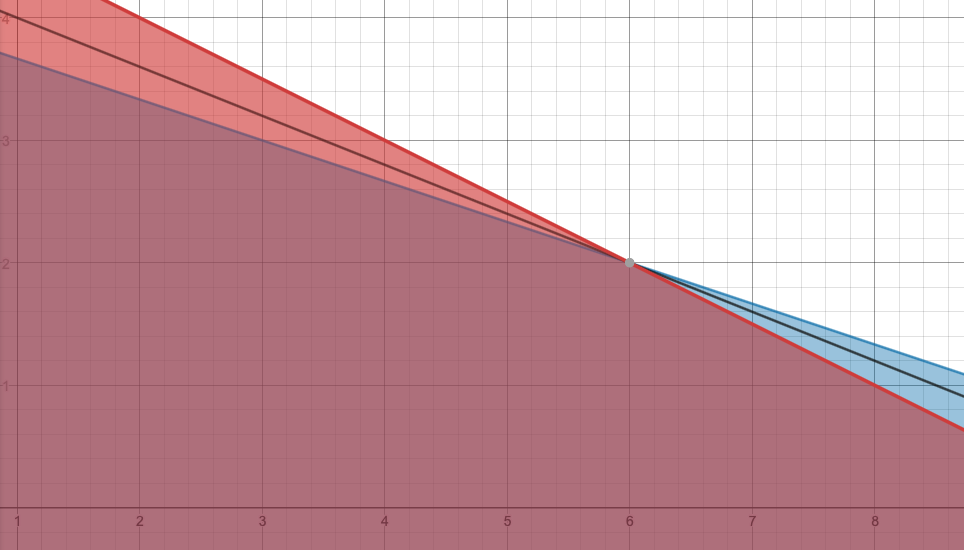

## Generating a Sensitivity Report in Python

Pyomo doesn't automatically generate a sensitivity analysis, but it's possible to write the model to a standardized file (called an LP file) and then run a solver to produce a sensitivity report.  

**First, run the following cell to load up a Wyndor model from lesson 1.**

In [1]:
# unfold to see Pyomo solution with a vector of decision variables
from pyomo.environ import *

# Concrete Model
model = ConcreteModel(name="Wyndor")

products = ['drs', 'wdw']

bounds_dict = {'drs': (0, 4), 'wdw': (0, 6)}
def bounds_rule(model, product):
    return (bounds_dict[product])
model.x = Var(products, domain=Reals, bounds=bounds_rule)

# Objective
model.profit = Objective(expr=3.0 * model.x['drs'] + 5.0 * model.x['wdw'],
                         sense=maximize)

# Constraints
model.Constraint1 = Constraint(expr= model.x['drs'] <= 4)
model.Constraint2 = Constraint(expr=2.0 * model.x['wdw'] <= 12)
model.Constraint3 = Constraint(expr=3.0 * model.x['drs'] + 2.0 * model.x['wdw'] <= 18)

# Solve
solver = SolverFactory('glpk')
solver.solve(model)

# display(model)

# display solution
import babel.numbers as numbers  # needed to display as currency
print("Profit = ",
      numbers.format_currency(1000 * model.profit(), 'USD', locale='en_US'))
print("Batches of Doors = ", model.x['drs']())
print("Batches of Windows = ", model.x['wdw']())

Profit =  $36,000.00
Batches of Doors =  2.0
Batches of Windows =  6.0


**Now run the cell belw to write the model to an LP file to create a sensitivity report.**

In [5]:
model.write('model.lp', io_options={'symbolic_solver_labels': True})
!glpsol -m model.lp --lp --ranges sensit.sen

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m model.lp --lp --ranges sensit.sen
Reading problem data from 'model.lp'...
2 rows, 3 columns, 3 non-zeros
21 lines were read
GLPK Simplex Optimizer, v4.65
2 rows, 3 columns, 3 non-zeros
Preprocessing...
1 row, 2 columns, 2 non-zeros
Scaling...
 A: min|aij| =  2.000e+00  max|aij| =  3.000e+00  ratio =  1.500e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 1
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.600000000e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (40400 bytes)
Write sensitivity analysis report to 'sensit.sen'...


**Run the following cell to print the report.**

In [6]:
# unfold for code, widen browser and/or close TOC to see sensitivity report
import numpy as np
np.set_printoptions(linewidth=110)
f = open('sensit.sen', 'r')
file_contents = f.read()
print(file_contents)
f.close()

GLPK 4.65 - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  profit = 36 (MAXimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 c_u_Constraint3_
                    NU      18.00000        .               -Inf       12.00000      -1.00000      30.00000 x(drs)
                                           1.00000      18.00000       24.00000          +Inf      42.00000 x(drs)

     2 c_e_ONE_VAR_CONSTANT
                    NS       1.00000        .            1.00000         .               -Inf      36.00000 ONE_VAR_CONSTANT
                                            .            1.00000   

**Run the following cell to make the notebook full width to get a better view of the sensitivity report.  You should also toggle off the Table of Contents in order to best display the sensitivity report.**

In [7]:
#hack to make this notebook full width to view sensitivity reports
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

## Discussion of Excel and GLPK Sensitivity Reports (video)

This video discussed the similarities and differences of the sensitivity reports produced by Excel (as discussed in the textbook) and Python.  Our focus will be the report produced in Python in this course.

In [1]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-sensitivity-reports/index.html",
    width=640,
    height=360)

## <font color="blue"> Self-Assessment: Solve and Perform Sensitivity </font>


**Textbook Problem 4.7-6 (c, b)**

Consider the following problem: 

Maximize $Z = 5 x_1 + 4x_2 - x_3 + 3_4$ 

subject to 

$ 3x_1 + 2x_2 - 3x_3 + x_4 \leq 24 \mbox{ (resource 1) } $

$ 3x_1 + 3x_2 + x_3 + 3x_4 \leq 36 \mbox{ (resource 2) }$

and $x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0.$ 

Use a Pyomo in Python to solve the
problem with the simplex method 
and then to generate sensitivity information. Use this
information to identify the shadow price for each resource, the
allowable range for each objective function coefficient, and the
allowable range for each right-hand side.


In [1]:
# Code for textbook problem 4.7-6(c)

from pyomo.environ import *

# Concret Model
model = ConcreteModel(name = "Generic")

# Decision Variables 
model.x = Var( ['x1','x2','x3','x4'], 
              domain = NonNegativeReals)

# Objective 
model.obj = Objective( expr = 5*model.x['x1'] + 4*model.x['x2'] - model.x['x3'] +
                      3*model.x['x4'], sense = maximize)

# Constraints
model.Constraint1 = Constraint( expr = 3*model.x['x1'] + 2*model.x['x2'] - 
                               3*model.x['x3'] + model.x['x4'] <= 24 )
model.Constraint2 = Constraint( expr = 3*model.x['x1'] + 3*model.x['x2'] + 
                               model.x['x3'] + 3*model.x['x4'] <= 36 )
                      
# Solve
solver = SolverFactory('glpk')
solver.solve(model)

# remove the comment symbol to see the pyomo display of results
# display(model)

# print a shorter summary of relevant results
print(" Z = ", model.obj())
print("x1 = ",model.x["x1"]())
print("x2 = ",model.x["x2"]())
print("x3 = ",model.x["x3"]())
print("x4 = ",model.x["x4"]())



 Z =  52.0
x1 =  11.0
x2 =  0.0
x3 =  3.0
x4 =  0.0


In [2]:
# write the model to a sensitivity report
model.write('model.lp', io_options={'symbolic_solver_labels': True})
!glpsol -m model.lp --lp --ranges sensit.sen

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m model.lp --lp --ranges sensit.sen
Reading problem data from 'model.lp'...
3 rows, 5 columns, 9 non-zeros
34 lines were read
GLPK Simplex Optimizer, v4.65
3 rows, 5 columns, 9 non-zeros
Preprocessing...
2 rows, 4 columns, 8 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  3.000e+00  ratio =  3.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (3)
*     2: obj =   5.200000000e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (40412 bytes)
Write sensitivity analysis report to 'sensit.sen'...


In [3]:
# widen browser and/or close TOC to see sensitivity report
import numpy as np
np.set_printoptions(linewidth=110)
f = open('sensit.sen', 'r')
file_contents = f.read()
print(file_contents)
f.close()

GLPK 4.65 - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  obj = 52 (MAXimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 c_u_Constraint1_
                    NU      24.00000        .               -Inf     -108.00000       -.66667     -36.00000 x(x1)
                                            .66667      24.00000       36.00000          +Inf      60.00000 x(x3)

     2 c_u_Constraint2_
                    NU      36.00000        .               -Inf       24.00000      -1.00000      40.00000 x(x3)
                                           1.00000      36.00000           +Inf        

## <font color="blue"> Self-Assessment: Formulate, Solve, and Perform Sensitivity #1 </font>

**Textbook Problem 7.3-4 (a & f with Pyomo)**

One of the products of the G.A. Tanner Company is a special
  kind of toy that provides an estimated unit profit of \\$3. Because
  of a large demand for this toy, management would like to increase
  its production rate from the current level of 1,000 per
  day. However, a limited supply of two subassemblies (A and B) from
  vendors makes this difficult. Each toy requires two subassemblies of
  type A, but the vendor providing these subassemblies would only be
  able to increase its supply rate from the current 2,000 per day to a
  maximum of 3,000 per day. Each toy requires only one subassembly of
  type B, but the vendor providing these subassemblies would be unable
  to increase its supply rate above the current level of 1,000 per
  day. Because no other vendors currently are available to provide
  these subassemblies, management is considering initiating a new
  production process internally that would simultaneously produce an
  equal number of subassemblies of the two types to supplement the
  supply from the two vendors. It is estimated that the company’s cost
  for producing one subassembly of each type would be \\$2.50 more than
  the cost of purchasing these subassemblies from the two
  vendors. Management wants to determine both the production rate of
  the toy and the production rate of each pair of subassemblies (one A
  and one B) that would maximize the total profit.  The following
  table summarizes the data for the problem.
  
  
<img src="images/problem5p3.png" width="440" height="250">  

(a) Formulate the mathematical model for this problem and solve it using Pyomo in Python.
  
(f) Generate a sensitivity report to find the allowable range for
  the unit profit of each activity (toys and subassemblies).

## <font color="blue"> Self-Assessment: Formulate, Solve, and Perform Sensitivity #2 </font>

**Textbook Problem 7.3-5 (a, b, f)**

Reconsider Problem 7.3-4. After further negotiations with
  each vendor, management of the G.A. Tanner Co. has learned that
  either of them would be willing to consider increasing their supply
  of their respective subassemblies over the previously stated maxima
  (3,000 subassemblies of type A per day and 1,000 of type B per day)
  if the company would pay a small premium over the regular price for
  the extra subassemblies. The size of the premium for each type of
  subassembly remains to be negotiated. The demand for the toy being
  produced is sufficiently high so that 2,500 per day could be sold if
  the supply of subassemblies could be increased enough to support
  this production rate. Assume that the original estimates of unit
  profits given in 7.3-4 are accurate.
  
(a) Formulate the mathematical model for this problem and with
  the original maximum supply levels and the additional constraint
  that no more than 2,500 toys should be produced per day.  Solve it using Pyomo in Python.
  
(b) Without considering the premium, use Pyomo
  to determine the shadow price for the subassembly A constraint by
  solving the model again after increasing the maximum supply by 1. Use this 
  shadow price to determine the maximum premium that the
  company should be willing to pay for each subassembly of this type.

(f) Use the sensitivity report to determine the shadow price
  for each of the subassembly constraints and the allowable range for
  the right-hand side of each of these constraints.

# Abstract Modeling for LP

To tackle larger linear programs it isn't practical to type out all of the variables, the terms in the objective function, or the individual constraints.  We need to move from a concrete model like this:
<img src="images/concrete_model.png" width="220">
to something more abstract like this:
<img src="images/abstract_model.png" width="320">

We'll still use the ```ConcreteModel``` object in Pyomo, but we'll start each problem by first laying out the data and then adding indexed variables to the model object.

Below we present several examples of generalizing models so that the model can be easily adapted to different problems.  Study these examples and use them to guide you in the homework.  Rather than give detailed videos for these examples we've tried to carefully write the necessary information.  Brief videos are provided to highlight a point or two.

## Wyndor - Abstract Formulation

### Problem Description

Again, here is the Wyndor model from the textbook.  $Z$ is the profit in thousands of dollars.  $d$ and $w$ are the batches of doors and windows, respectively.  The constraints, in order, represent the production capacities of Plants 1, 2, and 3.

Maximize $Z = 3 d + 5 w$

Subject to:

$
\begin{array}{ccccc}
 d &   &    & \leq & 4 \\
   &   & 2w & \leq & 12 \\
3d & + & 2w & \leq & 18
\end{array}
$

$d \geq 0$, $w \geq 0$

### Mathematical Formulation

We want to move from the above, very concrete, implementation to a more abstract representation which can be generalized to larger problems.

**The index sets:**

Let $Pr$ represent the set of products.  Symbolically we write $Pr = \{ \mbox{doors}, \mbox{windows} \}$.  

Let $Pl$ be set of plants so $Pl = \{ \mbox{Plant1}, \mbox{Plant2}, \mbox{Plant3} \}.$

In Python we can represent these index sets as any iterable object.  While it is possible to use Python sets here, we usually use Python lists because those are both iterable and subscriptable.  In Python the index sets look like this:

```
products = ['Doors', 'Windows']
plants = ['Plant1', 'Plant2', 'Plant3']
```

**The objective function:**

For each product $pr$ let $x_{pr}$ be the number of batches of that product to produce and let $c_{pr}$ be the profit rate per batch of $pr$ that is produced.  The objective function could be written as 
$$ Z = c_{\mbox{doors}} x_{\mbox{doors}} + c_{\mbox{windows}} x_{\mbox{windows}}.$$

More generally we can write: 
$$ Z = \sum_{pr \in Pr} c_{pr} x_{pr}.$$

In Python this will look like:
```sum(profit_rate[pr] * model.weekly_prod[pr] for pr in products)```

**The constraints:**

To start we can make all of the constraints look the same:
$$
\begin{array}{ccccc}
1 x_{\mbox{doors}} & + & 0 x_{\mbox{windows}} & \leq & 4 \\
0 x_{\mbox{doors}} & + & 2 x_{\mbox{windows}} & \leq & 12 \\
3 x_{\mbox{doors}} & + & 2 x_{\mbox{windows}} & \leq & 18
\end{array}
$$

Now we have three constraints, one for each plant, that has the form:
$$ (\mbox{hours per batch of doors}) * x_{\mbox{doors}} +
(\mbox{hours per batch of windows}) * x_{\mbox{windows}} \leq \mbox{hourly capacity}.$$

If we let $h_{pl,pr}$ represent the hours needed for a batch of product $pr$ at plant $pl$ and let $a_{pl}$ be the number of hours available at plant $pl$, then we can express the constraints as:

for each plant $pl \in Pl$ 
$$ \sum_{pr \in Pr} h_{pl,pr} x_{pr} \leq a_{pl}.$$

In Python this will look like:
```sum(hours_per_batch[pl][pr] * model.weekly_prod[pr] for pr in products)
    <= hours_available[pl]```
    
For comparison the concrete and abstract models are shown side-by-side:

<table class="tleft">
    <tr>
        <td><p style="padding-right: 120px;"> <b>Concrete Model</b></p></td>
        <td><p style="padding-right: 150px;"> <b>Abstract Model</b></p></td>
    </tr>
<tr>
<td>
Maximize $Z = 3 d + 5 w$
</td>
<td>
Maximize $ Z = \displaystyle \sum_{pr \in Pr} c_{pr} x_{pr}$
<td>
</tr>
<tr>
<td>
Subject to:

$
\begin{array}{ccccc}
 d &   &    & \leq & 4 \\
   &   & 2w & \leq & 12 \\
3d & + & 2w & \leq & 18
\end{array}
$
</td>
<td>
Subject to:

$ \displaystyle \sum_{pr \in Pr} h_{pl,pr} x_{pr} \leq a_{pl}, \mbox{ for each } pl \in Pl$
<td>
</tr>
<tr>
<td>
$d \geq 0$, $w \geq 0$
</td>
<td>
$ x_{pr} \geq 0, \mbox{ for each } pr \in Pr$ 
<td>
</tr>   
</table>

### Explanation of Pyomo Soution (video)

The video below explains some parts of the solution code.  If you're content to study the code on you own, then you don't need to watch it.  There is a bit in the middle that shows you how to view the abstractly constructed constraints that is generally useful.

In [9]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-wyndor-abstract/index.html",
    width=640,
    height=360)

### Pyomo Solution

In [2]:
# Unfold for code
from pyomo.environ import *
products = ['Doors', 'Windows']
plants = ['Plant1', 'Plant2', 'Plant3']
profit_rate = {'Doors': 3, 'Windows': 5}
hours_available = {'Plant1': 4, 'Plant2': 12, 'Plant3': 18}
hours_per_batch = {
    'Plant1': {
        'Doors': 1,
        'Windows': 0
    },
    'Plant2': {
        'Doors': 0,
        'Windows': 2
    },
    'Plant3': {
        'Doors': 3,
        'Windows': 2
    }
}

#Concrete Model
model = ConcreteModel()

#Decision Variables
model.weekly_prod = Var(products, domain=NonNegativeReals)

#Objective
model.profit = Objective(expr=sum(profit_rate[pr] * model.weekly_prod[pr]
                               for pr in products),
                      sense=maximize)

model.capacity = ConstraintList()
for pl in plants:
    model.capacity.add(
        sum(hours_per_batch[pl][pr] * model.weekly_prod[pr]
            for pr in products) <= hours_available[pl])

# Solve
solver = SolverFactory('glpk')
solver.solve(model)

# display solution
import babel.numbers as numbers  # needed to display as currency
print("Maximum Profit = ",
      numbers.format_currency(1000 * model.profit(), 'USD', locale='en_US'))

for j in products:
    print("Batches of " + j + " = {}".format(model.weekly_prod[j]()))

Maximum Profit =  $36,000.00
Batches of Doors = 2.0
Batches of Windows = 6.0


### <font color="blue">Self Assessment: Investment Allocation </font>

**Textbook Problem 3.2-3.** This is your lucky day. You have just won a \\$20,000
  prize. You are setting aside \\$8,000 for taxes and partying
  expenses, but you have decided to invest the other \\$12,000. Upon
  hearing this news, two different friends have offered you an
  opportunity to become a partner in two different entrepreneurial
  ventures, one planned by each friend. In both cases, this investment
  would involve expending some of your time next summer as well as
  putting up cash. Becoming a full partner in the first friend’s
  venture would require an investment of \\$10,000 and 400 hours, and
  your estimated profit (ignoring the value of your time) would be
  \\$9,000. The corresponding figures for the second friend’s venture
  are \\$8,000 and 500 hours, with an estimated profit to you of
  \\$9,000. However, both friends are flexible and would allow you to
  come in at any fraction of a full partnership you would like. If you
  choose a fraction of a full partnership, all the above figures given
  for a full partnership (money investment, time investment, and your
  profit) would be multiplied by this same fraction.  Because you were
  looking for an interesting summer job anyway (maximum of 600 hours),
  you have decided to participate in one or both friends’ ventures in
  whichever combination would maximize your total estimated
  profit. You now need to solve the problem of finding the best
  combination.
  
This self-assessment problem was also in Lesson 1 where you formulated and solved a linear model using the graphical method. Now copy and paste the code from the Wyndor problem above into a new cell and adapt it to solve this problem.

## Web Mercantile - Abstract Formulation

We first saw this problem in Lesson 1 where it was solved by introducing individual variables for each possible month and lease duration combination.  Such an approach was possible over a five month span, but imagine typing all of the variables and constraints for a 24 month, or longer, time period.  In the solution below, using indexed variables, the code can be easily adapted to any time period.  

The primary difference between this and the Wyndor example above is that the decision variables depend on both the month and the duration so they form an array.  Study this example to see 

### Problem Description

This is problem 3.4-9, page 85, from the textbook.  

Web Mercantile sells many household products through an online catalog. The company needs substantial warehouse space for storing its goods. Plans now are being made for leasing warehouse storage space over the next 5 months. Just how much space will be required in each of these months is known. However, since these space requirements are quite different, it may be most economical to lease only the amount needed each month on a month-by-month basis. On the other hand, the additional cost for leasing space for additional months is much less than for the first month, so it may be less expensive to lease the maximum amount needed for the entire 5 months. Another option is the intermediate approach of changing the total amount of space leased (by adding a new lease and/or having an old lease expire) at least once but not every month.

The space requirement and the leasing costs for the various leasing periods are as follows:

<img src="images/problem3p4-9.png" width="440" height="250">  

### Mathematical Formulation ###

Let $x_{m,d}$ represent the number of square feet to lease for $d$ months at the beginning of month $m$.

Let $r_d$ be the cost per square foot of leasing for a duration of $d$ months.

Let $s_m$ be the number of square feet required in month $m$.

Let $M$ be the set of months, e.g. $M = \{1,2,3,4,5\}.$

Let $D$ be the set of possible durations, e.g. $\{1,2,3,4,5\}.$

The total cost of leasing, to be minimized is:

$$ Z = \sum_{m \in M} \sum_{d \in D} r_d x_{m,d}.$$

Note, that $x_{m,d}$ will be 0 for some combinations of $m$ and $d$.  For instance, we'll have a constraint that $x_{5,2} = 0$ since in month 5 we cannot lease office space for 2 months.  In fact, if $m+d > 6$ we must have $x_{m,d} = 0$.  If we let $n_{mon}$ be the total number of months (e.g. $n_{mon} = 5$), then the constraint is 
$$ x_{m,d} = 0 \mbox{ if } m + d > n_{mon} $$

For the final constraint we need to make sure we have adequate space leased in each month.  We'll have to take into consideration that, for example, a lease made for 2 months at the beginning of month 1 will be available in the second month, but not in the third month. For each month we'll have add up all of the square feet that are leased in both the current month and previous months that are still available.  Mathematically, we can add conditions to our sum like this:

for month $m$

$$ \sum_{i \in M \mbox{ if } i \leq m} \sum_{\mbox{  }d \in D \mbox{ if } i + d > m} x_{i,d} \geq s_m. $$

That sum looks pretty complicated, but the first sum says to add up the leased square feet for all months up to and including the current month.  The second sum says to add only the leased square feet for unexpired leases.  If we treat the indices as integers we could also write it this way, for each month $m$:

$$ \sum_{i = 1}^m \sum_{d = m - i + 1}^{m} x_{m,d} \geq s_m.$$

Still confused? Look at the data frame below where we have months as rows and durations as columns:

In [13]:
# details not important, dataframe for example
import pandas as pd
df = pd.DataFrame([[10, 11, 12, 13, 14],[15,16,17,18,0],[19,20,21,0,0],[22,23,0,0,0],[24,0,0,0,0]], 
                  index = [1,2,3,4,5], columns = [1,2,3,4,5] )
df

,1,2,3,4,5
1,10,11,12,13,14
2,15,16,17,18,0
3,19,20,21,0,0
4,22,23,0,0,0
5,24,0,0,0,0


In month 1 the number of square feet leased is $ 10 + 11 + 12 + 13 + 14 = 60$.

In month 2 the number of square feet leased is $ 11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 = 116.$  Notice that the sum includes all the rentals from months 1 and 2 except for the 10 square feet rented at the beginning of month 1 for a duration of 1 month.  That term is not included in the sum because i + d = 1 + 1 = 2$ is not greater than 2 indicating that the 10 square feet is not available in month 2.

How many square feet are available in month 3?  In month 4?  In month 5?  (answers are 150, 148, and 100 respectively)

### Explanation of Pyomo Solution (video)

The video below explains some parts of the solution code.  If you're content to study the code on you own, then you don't need to watch it. 

In [10]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-webmercantile-abstract/index.html",
    width=640,
    height=360)

### Pyomo Solution

In [0]:
# unfold to see Pyomo solution

### Imports ###

from pyomo.environ import *

### Problem Data ###

num_months = 5
max_duration = 5

months = range(1, num_months + 1) # generates 1, 2, ..., num_months
durations = range(1, max_duration + 1) # generates 1, 2, ..., max_duration

rent = dict(zip(durations, [65, 100, 135, 160, 190]))
space = dict(zip(months, [30000, 20000, 40000, 10000, 50000]))

### Pyomo Model ###

# Concrete Model
model = ConcreteModel(name="WebMerc2")

# Decision Variables
model.x_sqft = Var(months, durations, domain=NonNegativeReals)

# Objective
model.obj = Objective(expr=sum(rent[d] * model.x_sqft[m, d] for m in months
                               for d in durations))

# Constraints
model.space_ct = ConstraintList()
for month in months:
    model.space_ct.add(
        sum(model.x_sqft[m, d] for m in months for d in durations
            if m <= month and m + d > month) >= space[month])

model.time_rule_ct = ConstraintList()
for m in months:
    for d in durations:
        if m + d > num_months + 1:
            model.time_rule_ct.add(model.x_sqft[m, d] == 0)

### Solution ###

solver = SolverFactory('glpk')
solver.solve(model)

### Display ###

import babel.numbers as numbers  # needed to display as currency
print("Total Cost = ",
      numbers.format_currency(model.obj(), 'USD', locale='en_US'))

print("\nHere are the amounts to lease by month and duration:")
for m in months:
    for d in durations:
        if model.x_sqft[m, d]() > 0:
            print("Lease {:.0f}".format(model.x_sqft[m, d]()) +
                  " sq ft in month {:d}".format(m) +
                  " for {:d} months".format(d))

print("\nHere are the amounts needed and the total amount needed in each month:")
for m in months:
    print("In month {:d}".format(m) +
          ", {:d} square feet are needed".format(space[m]) +
          " and {} square feet are leased".format(
              sum(model.x_sqft[i, d]() for d in durations
                  for i in months if i <= m and i + d > m)))

### <font color="blue">Self Assessment: A Holiday Factory </font>

A company is planning to design and manufacture children's toys over an 11 month span prior to a major holiday.  In the beginning the company won't need much space to design and plan the toy, but the square footage required will grow as they stockpile parts for the toys and start manufacturing.  Toward the end of the 11 month span the square feet required will start to diminish as toys are shipped to stores and distribution centers.  The square feet needed in each month is as follows:

Month | Square Feet | Month | Square Feet
--- | --- | --- | ---
1 | 2000 | 7 | 10000
2 | 2000 | 8 | 10000
3 | 3000 | 9 | 9000
4 | 4000 | 10 | 7000
5 | 6000 | 11 | 5000
6 | 10000


The rent per square foot starts at $20 per month, but decreases for leases of longer duration as follows. 

Duration (months) | Rent (\$ per square foot)
--- | --- 
1 | 20 
2 | 20 + 19 = 39 
3 | 20 + 19 + 18 = 57
$\vdots$ | $\vdots$
11 | 165

Learn how easy it is to reuse models by figuring out the pattern for durations and then adapting the example code above to find the minimum cost for the leasing the required square footage.  Try to find a way to compute the rent for each duration using a sum or a formula instead of just computing each by "hand".

## Sausages Blending - Abstract Formulation

This example, first presented in Lesson 1, is adapted from here: http://benalexkeen.com/linear-programming-with-python-and-pulp-part-4/.  
        
In Lesson 1 this problem was formulated and solved by introducing individual variables for each ingredient and sausage type.  Here we'll use an array of variables and configure the objective function and constraints in a way that can be more easily generalized.
The second will be to write the model in a way that can be easily extended.

### Problem Description

We're going to make sausages by blending pork, wheat, and starch.  Our objective is to minimize the cost of making the sausages.  The table below shows the ingredients available, the cost, and the amount of each ingredient available from our supplier:

Ingredient | Cost ($/kg) | Amount (kg)
-----------|------|--------------
Pork       | 4.32 | 7
Wheat      | 2.46 | 20.0
Starch     | 1.86 | 17

Additionally, we have 23 kg of pork on hand that we must use in the sausages.

We want to make 2 types of sausage:
* Economy ( > 40\% pork)
* Premium ( > 60\% pork)

Each sausage is 50 grams (0.05 kg).  

According to government regulations, the most starch we can use in our sausages is 25\% by weight.

We have a demand for 350 economy sausages and 500 premium sausages.

### Mathematical formulation

We'll write things generically so that the model can be used for any numbers of ingredients and types.

Let $I$ represent the set of ingredients and let $T$ represent the set of types of sausage.

For each $i \in I$ and $t \in T$ 

<table class="tleft">
    <tr>
        <td><p style="padding-right: 20px;"> <b>Quantity</b></p></td>
        <td><p style="padding-right: 100px;"> <b>Description</b></p></td>
    <tr>
    <tr><td>$x_{i,t}$</td><td>kg of ingredient $i$ to use in sausage of type $t$ (decision variable)</td></tr>
    <tr><td>$c_i$</td><td>cost per kg of ingredient $i$ in dollars</td></tr>
    <tr><td>$pmin_{i,t}$</td><td>minimum proportion of ingredient $i$ in sausage of type $t$, use 0 for no minimum</td></tr>
    <tr><td>$pmax_{i,t}$</td><td>maximum proportion of ingredient $i$ in sausage of type $t$, use 1 for no maximum</td></tr>
    <tr><td>$imax_{i}$</td><td>maximum kilograms of ingredient $i$ that are available</td></tr>
    <tr><td>$imin_{i}$</td><td>minimum kilograms of ingredient $i$ that must be used</td></tr>
    <tr><td>$d_{t}$</td><td>total kg of sausage of type $t$ that are demanded</td></tr>
</table>

To write the cost function we need to add up the quantity of each ingredient used across all the sausage types, so for each ingredient $i$ this is $$\sum_{t \in T} x_{i,t}.$$
Now the cost of ingredient $i$ will be
$$ c_i \left( \sum_{t \in T} x_{i,t} \right).$$
Finally, the objective function is the total cost for all ingredients and types:
$$ \mbox{Cost} = \sum_{i \in I}  c_i \left( \sum_{t \in T} x_{i,t} \right).$$

Now let's turn to the constraints.  First we need the total kg of each type of sausage made to equal the demand for that type. 

$$ \sum_{i \in I} x_{i,t} = d_t \mbox{ for each } t \in T.$$

The sum on the left represents the total kg of ingredients used in sausage $j$.

Now we need the minimum proportion constraints:
$$x_{i,t} \geq pmin_{i,t} \sum_{k \in I} x_{k,t}.$$

That sum on the right now uses the index $k$ which serves as a dummy variable to add up the total kg of each type of sausage.

The maximum proportion constraints are similar:
$$x_{i,t} \leq pmax_{i,t} \sum_{k \in I} x_{k,t}.$$

The availability constraints enforce the maximum amount of ingredient $i$ that is available:
$$\sum_{t \in T} x_{i,t} \leq imax_i.$$
The sum on the left here is the total kg of ingredient $i$ used over all types of sausages.

The "must use" constraints are similar:
$$\sum_{t \in T} x_{i,t} \geq imin_i.$$


Here are the concrete and abstract model comparisons side-by-side for comparison:
<table class="tleft">
    <tr>
        <td><p style="padding-right: 40px;"> <b>Description</b></p></td>
        <td><p style="padding-right: 120px;"> <b>Concrete Model</b></p></td>
        <td><p style="padding-right: 120px;"> <b>Abstract Model</b></p></td>
    </tr>
<tr>
    <td> Minimize Cost = </td>
    <td>
        $4.32 ( p_e + p_p) + 2.46( w_e + w_p) + 1.86 (s_e + s_p) $
    </td>
    <td>
        $\displaystyle \sum_{i \in I}  c_i \left(\sum_{t \in T} x_{i,t} \right)$
    <td>
</tr>
<tr>
    <td> Demand Constraints </td>
    <td> $p_e + w_e + s_e = 350 \times 0.05$<br>$p_p + w_p + s_p = 500 \times 0.05$ </td>
    <td> $\displaystyle \sum_{i \in I} x_{i,t} = d_t \mbox{ for each } t \in T$ </td>
</tr>
<tr>
    <td> Minimimum Proportion<br>Constraints </td>
    <td> $p_e \geq 0.4 (p_e + w_e + s_e)$<br>$p_p \geq 0.6 (p_p + w_p + s_p)$</td>
    <td> $\displaystyle x_{i,t} \geq pmin_{i,t} \sum_{k \in I} x_{k,t}$</td>
</tr>
<tr>
    <td> Maximum Proportion<br>Constraints </td>
    <td> $s_e \leq 0.25 (p_e + w_e + s_e)$<br>$s_p \leq 0.25 (p_p + w_p + s_p)$ </td>
    <td> $\displaystyle x_{i,t} \leq pmax_{i,t} \sum_{k \in I} x_{k,t}$ </td>
<tr>
    <td> Maximum Ingredient<br>Constraints </td>
    <td> $p_e + p_p \leq 30$<br>$w_e + w_p \leq 20$<br>$s_e + s_p \leq 17$ </td>
    <td> $\displaystyle \sum_{t \in T} x_{i,t} \leq imax_i$</td>
</tr>
<tr>
    <td> Minimum Ingredient<br>Constraints </td>
    <td> $p_e + p_p \geq 23$</td>
    <td> $\displaystyle \sum_{t \in T} x_{i,t} \geq imin_i$</td>
</tr>
</table>

### Explanation of Pyomo Solution (video)

The video below explains some parts of the solution code.  If you're content to study the code on you own, then you don't need to watch it.  

In [12]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson2-blending-abstract/index.html",
    width=640,
    height=360)

### Pyomo Solution

In [2]:
# Unfold to see the Pyomo solution with arrays of decision variables

### Imports ###

from pyomo.environ import *
import pandas as pd # used for results display

### Problem Data ###

types = ['economy','premium']
ingredients = ['pork', 'wheat', 'starch']

cost = dict( zip( ingredients, [4.32, 2.46, 1.86] ) )

kg_per_sausage = 0.05
number_each_type = dict( zip( types, [350, 500] ) )

mnpi = [[.4,.6],[0,0],[0,0]]
min_prop_ing = { ingredients[i]:{ types[j]:mnpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }
mxpi = [[1,1],[1,1],[.25,.25]]
max_prop_ing = { ingredients[i]:{ types[j]:mxpi[i][j] for j in range(len(types)) } for i in range(len(ingredients)) }

max_ingredient = dict( zip( ingredients, [30, 20, 17] ) )
min_ingredient = dict( zip( ingredients, [23,  0,  0] ) )

min_prop_ing

{'pork': {'economy': 0.4, 'premium': 0.6},
 'wheat': {'economy': 0, 'premium': 0},
 'starch': {'economy': 0, 'premium': 0}}

In [66]:
### Pyomo Model ###

# Concrete Model
M = ConcreteModel(name = "Sausages")

# Decision Variables
M.amount = Var(ingredients, types, domain = NonNegativeReals)

# Objective
M.cost = Objective( expr = sum( cost[i] * sum(M.amount[i,t] for t in types) 
                               for i in ingredients), sense = minimize )

M.tot_sausages_ct = ConstraintList()
for t in types:
    M.tot_sausages_ct.add( sum( M.amount[i,t] for i in ingredients ) 
                         == kg_per_sausage * number_each_type[t] )

M.min_prop_ct = ConstraintList()
for i in ingredients:
    for t in types:
        M.min_prop_ct.add( M.amount[i,t] >= min_prop_ing[i][t] *
                         sum( M.amount[k,t] for k in ingredients ) )

M.max_prop_ct = ConstraintList()
for i in ingredients:
    for t in types:
        M.max_prop_ct.add( M.amount[i,t] <= max_prop_ing[i][t] * 
                         sum( M.amount[k, t] for k in ingredients ) )
        
M.max_ingredient_ct = ConstraintList()
for i in ingredients:
    M.max_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) <= 
                           max_ingredient[i] )
    
M.min_ingredient_ct = ConstraintList()
for i in ingredients:
    M.min_ingredient_ct.add( sum( M.amount[ i, t] for t in types ) >=
                           min_ingredient[i] )

### Solution ###
solver = SolverFactory('glpk')
solver.solve(M)

### Display ###

import babel.numbers as numbers  # needed to display as currency
print("Total Cost = ",
      numbers.format_currency(M.cost(), 'USD', locale='en_US'))

# put amounts in dataframe for nicer display
import pandas as pd
dvars = pd.DataFrame( [ [M.amount[i,t]() for t in types] for i in ingredients ],
                    index = ['Pork','Wheat','Starch'],
                    columns = ['Economy','Premium'])
print("Kilograms of each ingredient in each type of sausage:")
dvars

Total Cost =  $140.96
Kilograms of each ingredient in each type of sausage:


,Economy,Premium
Pork,8.000,15.00
Wheat,5.125,3.75
Starch,4.375,6.25


### <font color="blue">Self Assessment: Supply and Demand Problem </font>

Use what you've learned in the examples above to formulate and solve a linear programmming model for textbook problem 3.4-11.

The Medequip Company produces precision medical diagnostic equipment at two factories. Three medical centers have placed orders for this month’s production output. The table below shows what the cost would be for shipping each unit from each factory to each of these customers. Also shown are the number of units that will be produced at each factory and the number of units ordered by each customer.

<table>
    <tr>
        <th style="border-right:thin solid;border-bottom:thin solid;"> &nbsp; </th>
        <th style="border-bottom:thin solid;"> Customer 1</th>
        <th style="border-bottom:thin solid;"> Customer 2</th>
        <th style="border-bottom:thin solid;"> Customer 3</th>
        <th style="border-left: thin solid;border-bottom:thin solid;"> Output</th>
    </tr>
    <tr>
        <td style="border-right:thin solid;"> <b>Factory 1</b> </td>
        <td> \$600 </td>
        <td> \$800 </td>
        <td> \$700 </td>
        <td style="border-left:thin solid;"> 400 units </td>
    </tr>
    <tr>
        <td style="border-right:thin solid;"> <b>Factory 2</b> </td>
        <td> \$400 </td>
        <td> \$900 </td>
        <td> \$600 </td>
        <td style="border-left:thin solid;"> 500 units </td>
    </tr>       
    <tr>
        <td style="border-top:thin solid;border-right:thin solid"> <b>Order size</b> </td>
        <td style="border-top:thin solid;"> 300 units </td>
        <td style="border-top:thin solid;"> 200 units </td>
        <td style="border-top:thin solid;"> 400 units </td>
        <td style="border-left:thin solid; border-top:thin solid;"> &nbsp; </td>
    </tr>
</table>